In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\A058252\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\A058252\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [48]:
data = pd.read_csv(r"D:\DSProject\amazon_reviews_us_Video_Games_v1_00.tsv", sep="\t", error_bad_lines=False)

C:\Users\A058252\AppData\Local\Temp/ipykernel_34756/4209201055.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(r"D:\DSProject\amazon_reviews_us_Video_Games_v1_00.tsv", sep="\t", error_bad_lines=False)
b'Skipping line 20630: expected 15 fields, saw 22\nSkipping line 28172: expected 15 fields, saw 22\nSkipping line 54791: expected 15 fields, saw 22\n'
b'Skipping line 75419: expected 15 fields, saw 22\nSkipping line 104832: expected 15 fields, saw 22\n'
b'Skipping line 138464: expected 15 fields, saw 22\nSkipping line 194849: expected 15 fields, saw 22\n'
b'Skipping line 201568: expected 15 fields, saw 22\nSkipping line 242567: expected 15 fields, saw 22\n'
b'Skipping line 493585: expected 15 fields, saw 22\nSkipping line 502478: expected 15 fields, saw 22\n'
b'Skipping line 660750: expected 15 fields, saw 22\n'


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780268 entries, 0 to 1780267
Data columns (total 15 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   marketplace        object
 1   customer_id        int64 
 2   review_id          object
 3   product_id         object
 4   product_parent     int64 
 5   product_title      object
 6   product_category   object
 7   star_rating        int64 
 8   helpful_votes      int64 
 9   total_votes        int64 
 10  vine               object
 11  verified_purchase  object
 12  review_headline    object
 13  review_body        object
 14  review_date        object
dtypes: int64(5), object(10)
memory usage: 203.7+ MB


In [50]:
data.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,12039526,RTIS3L2M1F5SM,B001CXYMFS,737716809,Thrustmaster T-Flight Hotas X Flight Stick,Video Games,5,0,0,N,Y,an amazing joystick. I especially love that yo...,"Used this for Elite Dangerous on my mac, an am...",2015-08-31
1,US,9636577,R1ZV7R40OLHKD,B00M920ND6,569686175,Tonsee 6 buttons Wireless Optical Silent Gamin...,Video Games,5,0,0,N,Y,Definitely a silent mouse... Not a single clic...,"Loved it, I didn't even realise it was a gami...",2015-08-31
2,US,2331478,R3BH071QLH8QMC,B0029CSOD2,98937668,Hidden Mysteries: Titanic Secrets of the Fatef...,Video Games,1,0,1,N,Y,One Star,poor quality work and not as it is advertised.,2015-08-31
3,US,52495923,R127K9NTSXA2YH,B00GOOSV98,23143350,GelTabz Performance Thumb Grips - PlayStation ...,Video Games,3,0,0,N,Y,"good, but could be bettee","nice, but tend to slip away from stick in inte...",2015-08-31
4,US,14533949,R32ZWUXDJPW27Q,B00Y074JOM,821342511,Zero Suit Samus amiibo - Japan Import (Super S...,Video Games,4,0,0,N,Y,Great but flawed.,"Great amiibo, great for collecting. Quality ma...",2015-08-31


<AxesSubplot:>

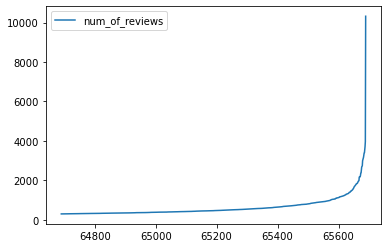

In [51]:
reviews_per_product = data.groupby(["product_id"])["review_id"].nunique().sort_values().reset_index().rename({"review_id":"num_of_reviews"}, axis=1)

reviews_per_product.tail(1000).plot()   

In [52]:
reviews_per_product["num_of_reviews"].quantile([0.01,0.1,0.25, 0.5,0.75,0.9,0.99])


0.01      1.00
0.10      1.00
0.25      1.00
0.50      4.00
0.75     16.00
0.90     55.00
0.99    396.11
Name: num_of_reviews, dtype: float64

<AxesSubplot:xlabel='marketplace', ylabel='count'>

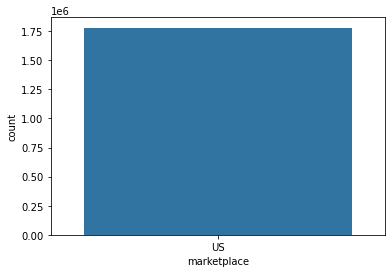

In [53]:
sns.countplot(x=data["marketplace"])

<AxesSubplot:xlabel='product_category', ylabel='count'>

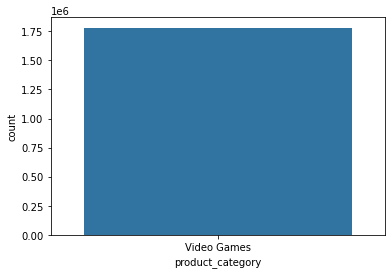

In [54]:
sns.countplot(x=data["product_category"])

<AxesSubplot:xlabel='star_rating', ylabel='count'>

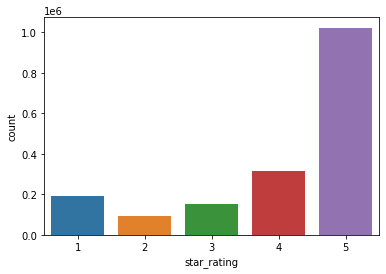

In [55]:
sns.countplot(x=data["star_rating"])
# Problems with some ratings

In [56]:
data["rating_problems"] = data["star_rating"].apply(lambda x: False if x in [1,2,3,4,5,"1", "2", "3", "4", "5" ] else True) 
data["star_rating"].value_counts(normalize=1)
data["rating_problems"].value_counts(normalize=1)

False    1.0
Name: rating_problems, dtype: float64

<AxesSubplot:xlabel='star_rating', ylabel='count'>

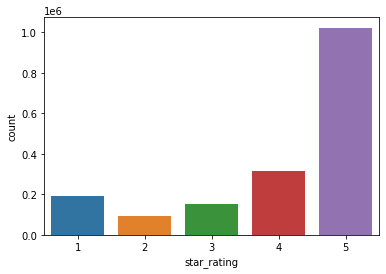

In [57]:
data = data[data["rating_problems"] != True]
data["star_rating"] = data["star_rating"].astype("int")
sns.countplot(x=data["star_rating"])

In [58]:
# Data is very imbalanced across classes

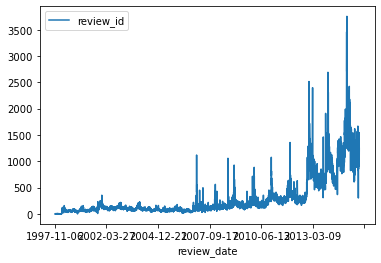

In [59]:
reviews_over_time = data.groupby("review_date").agg({"review_id":"count"}).plot(kind="line")

<AxesSubplot:title={'center':'Reviews per product'}, xlabel='star_rating'>

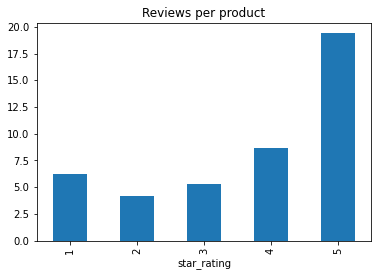

In [60]:
num_rev_prod_per_rating = data.groupby("star_rating").agg({"review_id":lambda x: x.nunique(), "product_id": lambda x: x.nunique()} )
num_rev_prod_per_rating["rev_per_prod"] = num_rev_prod_per_rating.apply(lambda x: x["review_id"] / x["product_id"], axis=1)
num_rev_prod_per_rating["rev_per_prod"].plot(kind="bar", title="Reviews per product")

<AxesSubplot:xlabel='star_rating,verified_purchase'>

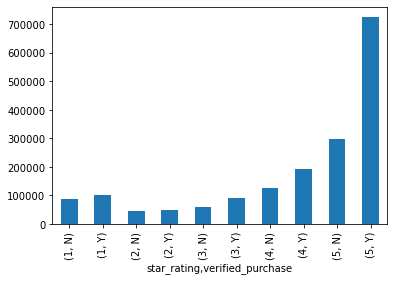

In [61]:
data.groupby(["star_rating", "verified_purchase"])["review_id"].count().plot(kind="bar")

In [62]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.stem.snowball import EnglishStemmer
stemmer = EnglishStemmer()


stop_words.update(["car", "work", "product", "install"])

def tokenization_and_stemming(text):
    tokens = []
    # exclude stop words and tokenize the document, generate a list of string 
    for word in word_tokenize(text):
        if word.lower() not in stop_words:
            tokens.append(word.lower())

    filtered_tokens = []
    
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if token.isalpha(): # filter out non alphabet words like emoji
            filtered_tokens.append(token)
            
    # stemming
    # Removes ing also in anything ...
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return_string = " ".join(stems)
    
    return return_string


In [63]:
data = data.dropna(subset=['review_body'])

In [64]:
data["processed_reviews"] = data["review_body"].apply(lambda x: tokenization_and_stemming(x))

In [65]:
data.head(3)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,rating_problems,processed_reviews
0,US,12039526,RTIS3L2M1F5SM,B001CXYMFS,737716809,Thrustmaster T-Flight Hotas X Flight Stick,Video Games,5,0,0,N,Y,an amazing joystick. I especially love that yo...,"Used this for Elite Dangerous on my mac, an am...",2015-08-31,False,use elit danger mac amaz joystick especi love ...
1,US,9636577,R1ZV7R40OLHKD,B00M920ND6,569686175,Tonsee 6 buttons Wireless Optical Silent Gamin...,Video Games,5,0,0,N,Y,Definitely a silent mouse... Not a single clic...,"Loved it, I didn't even realise it was a gami...",2015-08-31,False,love even realis game mous type silent mous se...
2,US,2331478,R3BH071QLH8QMC,B0029CSOD2,98937668,Hidden Mysteries: Titanic Secrets of the Fatef...,Video Games,1,0,1,N,Y,One Star,poor quality work and not as it is advertised.,2015-08-31,False,poor qualiti advertis


In [66]:
data = data.dropna(subset="processed_reviews")
processed_review_string = data.groupby("star_rating").aggregate({"processed_reviews":lambda x: " \n ".join(x)})

In [67]:
def wc_for_rating(rating):
    wordcloud = WordCloud(collocations=True).generate(processed_review_string.loc[rating][0][1:5000000].replace("one", "").replace("use", "").replace(" br ", " ").replace("car", "").replace("work", ""))
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

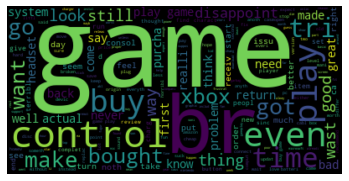

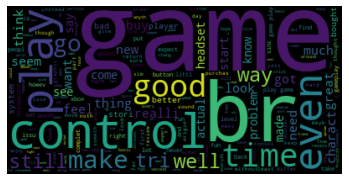

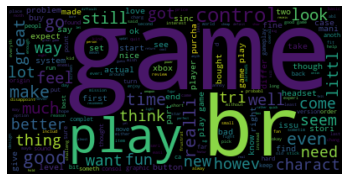

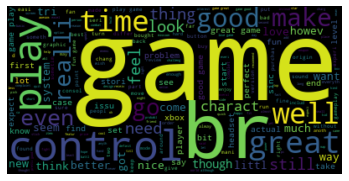

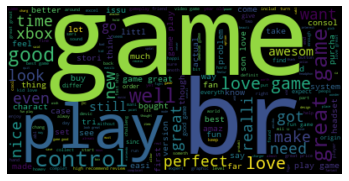

In [68]:
wc_for_rating(1)
wc_for_rating(2)
wc_for_rating(3)
wc_for_rating(4)
wc_for_rating(5)

In [69]:
if True:
    data.to_csv(r"D:\DSProject\VideoGames_transformed.csv")
else:
    data = pd.read_csv(r"D:\DSProject\amazon_reviews_us_Automotive_v1_00_transformed.csv")

In [70]:
data.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,rating_problems,processed_reviews
0,US,12039526,RTIS3L2M1F5SM,B001CXYMFS,737716809,Thrustmaster T-Flight Hotas X Flight Stick,Video Games,5,0,0,N,Y,an amazing joystick. I especially love that yo...,"Used this for Elite Dangerous on my mac, an am...",2015-08-31,False,use elit danger mac amaz joystick especi love ...
1,US,9636577,R1ZV7R40OLHKD,B00M920ND6,569686175,Tonsee 6 buttons Wireless Optical Silent Gamin...,Video Games,5,0,0,N,Y,Definitely a silent mouse... Not a single clic...,"Loved it, I didn't even realise it was a gami...",2015-08-31,False,love even realis game mous type silent mous se...
2,US,2331478,R3BH071QLH8QMC,B0029CSOD2,98937668,Hidden Mysteries: Titanic Secrets of the Fatef...,Video Games,1,0,1,N,Y,One Star,poor quality work and not as it is advertised.,2015-08-31,False,poor qualiti advertis
3,US,52495923,R127K9NTSXA2YH,B00GOOSV98,23143350,GelTabz Performance Thumb Grips - PlayStation ...,Video Games,3,0,0,N,Y,"good, but could be bettee","nice, but tend to slip away from stick in inte...",2015-08-31,False,nice tend slip away stick intens hard press ga...
4,US,14533949,R32ZWUXDJPW27Q,B00Y074JOM,821342511,Zero Suit Samus amiibo - Japan Import (Super S...,Video Games,4,0,0,N,Y,Great but flawed.,"Great amiibo, great for collecting. Quality ma...",2015-08-31,False,great amiibo great collect qualiti materi desi...


In [71]:
data = data.dropna(subset="processed_reviews")
# Lots of foreign languages in the dataset, thus filter for marketplace = US
tokens = data[data["marketplace"]=="US"]["processed_reviews"].apply(lambda x: x.split(" "))


In [72]:
token_list = [item for sublist in list(tokens) for item in sublist] 

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit_transform(token_list)
tokenized = vectorizer.vocabulary_

In [74]:
sorted_tokens = sorted(tokenized.items(), key=lambda x: x[1], reverse=True)

In [75]:
sorted_tokens

[('환불받기', 243632),
 ('할인하길래', 243631),
 ('한국이다', 243630),
 ('한국예판자들보다', 243629),
 ('한국에서', 243628),
 ('하나는', 243627),
 ('타입', 243626),
 ('코인', 243625),
 ('컨트롤러를', 243624),
 ('카드도', 243623),
 ('총의', 243622),
 ('초반에', 243621),
 ('지불하지', 243620),
 ('좋아요', 243619),
 ('좋아', 243618),
 ('제품가격보다', 243617),
 ('제발', 243616),
 ('정확하게', 243615),
 ('정말', 243614),
 ('전혀', 243613),
 ('재밌고', 243612),
 ('잘산거같아요', 243611),
 ('잘나오고요', 243610),
 ('작동되지', 243609),
 ('자주', 243608),
 ('있어서', 243607),
 ('이용할께용', 243606),
 ('이런', 243605),
 ('위해', 243604),
 ('연결하고', 243603),
 ('여기는', 243602),
 ('어렵다', 243601),
 ('앞으로', 243600),
 ('아예', 243599),
 ('아마존', 243598),
 ('아래의', 243597),
 ('쓰레기통에', 243596),
 ('쓰레기를', 243595),
 ('수고하셨습니다', 243594),
 ('셀렉트', 243593),
 ('사지마라', 243592),
 ('빨리', 243591),
 ('빠르고', 243590),
 ('북미판', 243589),
 ('보정을', 243588),
 ('버튼을', 243587),
 ('버튼들은', 243586),
 ('배송료가', 243585),
 ('배송도', 243584),
 ('방아쇠만', 243583),
 ('방아쇠를', 243582),
 ('받을', 243581),
 ('반값으로', 243580),
 ('말라고', 243579),
 (

In [76]:
# Lots of foreign languages in the dataset, thus filter for marketplace = US
tokens_us = data[data["marketplace"]=="US"]["processed_reviews"].apply(lambda x: x.split(" "))

#Filter does not help, maybe regexp filter

In [77]:
token_list_us = [item for sublist in list(tokens_us) for item in sublist] 
vectorizer_us = CountVectorizer()
vectorizer_us.fit_transform(token_list_us)
tokenized_us = vectorizer_us.vocabulary_

In [78]:
sorted_tokens_us = sorted(tokenized_us.items(), key=lambda x: x[1], reverse=True)
sorted_tokens_us[2000:3000]

[('yuriko', 241632),
 ('yurick', 241631),
 ('yuria', 241630),
 ('yuri', 241629),
 ('yurei', 241628),
 ('yurbud', 241627),
 ('yurarin', 241626),
 ('yur', 241625),
 ('yupyup', 241624),
 ('yupptv', 241623),
 ('yuppi', 241622),
 ('yupper', 241621),
 ('yupp', 241620),
 ('yuplay', 241619),
 ('yupeeroo', 241618),
 ('yup', 241617),
 ('yuour', 241616),
 ('yuoug', 241615),
 ('yuou', 241614),
 ('yuoth', 241613),
 ('yuorself', 241612),
 ('yuor', 241611),
 ('yuol', 241610),
 ('yuo', 241609),
 ('yunsung', 241608),
 ('yuno', 241607),
 ('yunno', 241606),
 ('yunjin', 241605),
 ('yuni', 241604),
 ('yungsung', 241603),
 ('yungo', 241602),
 ('yungin', 241601),
 ('yunggunz', 241600),
 ('yunger', 241599),
 ('yunga', 241598),
 ('yung', 241597),
 ('yune', 241596),
 ('yunaz', 241595),
 ('yunascela', 241594),
 ('yunalesca', 241593),
 ('yuna', 241592),
 ('yun', 241591),
 ('yump', 241590),
 ('yummmmm', 241589),
 ('yummmm', 241588),
 ('yummmi', 241587),
 ('yummm', 241586),
 ('yummi', 241585),
 ('yumipon', 241584),

In [79]:
sorted_tokens_us[5000:6000]

[('xame', 238632),
 ('xam', 238631),
 ('xaldin', 238630),
 ('xalax', 238629),
 ('xako', 238628),
 ('xak', 238627),
 ('xaivx', 238626),
 ('xaivier', 238625),
 ('xaioyu', 238624),
 ('xain', 238623),
 ('xagx', 238622),
 ('xagm', 238621),
 ('xaffax', 238620),
 ('xaero', 238619),
 ('xacto', 238618),
 ('xact', 238617),
 ('xabr', 238616),
 ('xabi', 238615),
 ('xab', 238614),
 ('xaa', 238613),
 ('wıthout', 238612),
 ('wıth', 238611),
 ('wıll', 238610),
 ('würde', 238609),
 ('wünschenswert', 238608),
 ('wü', 238607),
 ('wären', 238606),
 ('wäre', 238605),
 ('wär', 238604),
 ('wzw', 238603),
 ('wzpolsiona', 238602),
 ('wzake', 238601),
 ('wz', 238600),
 ('wyłańcza', 238599),
 ('wyzen', 238598),
 ('wyvren', 238597),
 ('wyvernrid', 238596),
 ('wyvernlord', 238595),
 ('wyvernian', 238594),
 ('wyvern', 238593),
 ('wyth', 238592),
 ('wytcher', 238591),
 ('wystern', 238590),
 ('wyss', 238589),
 ('wysiwyg', 238588),
 ('wysewomon', 238587),
 ('wyrnn', 238586),
 ('wyrmrest', 238585),
 ('wyrmguard', 23858

In [80]:
data.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date', 'rating_problems',
       'processed_reviews'],
      dtype='object')

In [81]:
import re
r = re.compile(r"[a-zA-Z]+")
test = r.match('çáêôæíô')
test2 = r.match('windshiield')

token_list_an = [item for item in token_list_us if not (r.match(item) is None)] 

In [82]:
vectorizer_an = CountVectorizer()
vectorizer_an.fit_transform(token_list_an)
tokenized_an = vectorizer_an.vocabulary_

In [83]:
sorted_tokens_an = sorted(tokenized_an.items(), key=lambda x: x[1], reverse=True)

In [84]:
sorted_tokens_an

[('zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz',
  243079),
 ('zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz', 243078),
 ('zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz', 243077),
 ('zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz', 243076),
 ('zzzzzzzzzzzzzzzzzzzzzzzzzzzzzz', 243075),
 ('zzzzzzzzzzzzzzzzzzzzzzzzzz', 243074),
 ('zzzzzzzzzzzzzzzzzzzzzzzzz', 243073),
 ('zzzzzzzzzzzzzzzzzzzzzzzz', 243072),
 ('zzzzzzzzzzzzzzzzzzzzzzooooooooooooooooommmmmmmbbbbbbbbbbiiiiiiiieeeeeeeeeeeeeeeeeeesssssssssssssssss',
  243071),
 ('zzzzzzzzzzzzzzzzzzzzz', 243070),
 ('zzzzzzzzzzzzzzzzzzzz', 243069),
 ('zzzzzzzzzzzzzzzzzzz', 243068),
 ('zzzzzzzzzzzzzzzzzz', 243067),
 ('zzzzzzzzzzzzzzzzz', 243066),
 ('zzzzzzzzzzzzzzzz', 243065),
 ('zzzzzzzzzzzzzzz', 243064),
 ('zzzzzzzzzzzzzz', 243063),
 ('zzzzzzzzzzzzz', 243062),
 ('zzzzzzzzzzzziiiiiiiiiinnnnnnnnnnngggggggggg', 243061),
 ('zzzzzzzzzzzz', 243060),
 ('zzzzzzzzzzz', 243059),
 ('zzzzzzzzzz', 243058),
 ('zzzzzzzzzuuuuuummnnnbbbbbbbbaaaa